In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
from pathlib import Path
import pickle as pkl
import sys
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import csv
from sklearn.metrics import mean_squared_error, r2_score
import calendar

# working directory

In [2]:
sitename = "BART_NEON"
project_dir = Path(f"F:/NEON_gapfill/")
site_data_dir = project_dir 
model_dir = site_data_dir / "XGB_models"
model_dir.mkdir(exist_ok=True)
data_train_test_dir = site_data_dir / "FC_data_train_test"
sys.path.append(site_data_dir)
os.chdir(site_data_dir)
cwd = os.getcwd()
print("Current working directory: ", cwd)
learning_curve_dir = site_data_dir / "learning_curve"
learning_curve_dir.mkdir(exist_ok=True)
test_performance_dir = site_data_dir / "test_performance"
test_performance_dir.mkdir(exist_ok=True)

import function_XGB as fun_XGB # a python script with all functions

Current working directory:  f:\NEON_gapfill


# input features and target variable


In [3]:
predictors = ['TIMESTAMP_END', 'GCC', 'EVI', 'Tair', 'VPD', 'PPFD']
y_col = "NEE_for_gapfill"

# load data

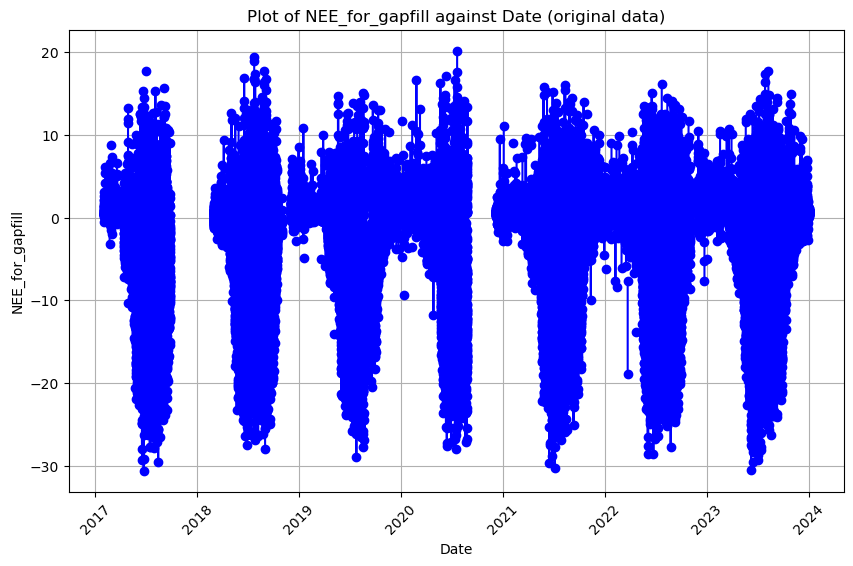

In [4]:
site_name = "BART_NEON"
file_name = f"data_for_XGB_{site_name}.csv"  
site_data, site_data_no_na = fun_XGB.load_data(site_data_dir, file_name, y_col)

# 01 find the best hyperparameters

In [5]:
# param_FC = fun_XGB.find_hyperparameters(site_data_no_na, predictors, y_col, model_dir) 
# this line takes a long time to run (> 5 hours), please skip it and load the saved model to test the rest of the script

In [6]:
# load the model after hyperparameter tuning
model_path = (model_dir ) / "FC_XGB_model.pkl"
with open(model_path, 'rb') as f:
    reg = pkl.load(f)
reg

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=50, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

# 02 model performance

In [ ]:
fun_XGB.create_train_test_folds(site_data, site_data_dir, y_col) 
# I saved 10 fold train and test data under / data_train_test_dir, then read in the data in the check_model_performance, which is not very efficient

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=50, num_parallel_tree=None, predictor=None,
             random_state=42, ...)
Train/test files saved in F:\NEON_gapfill\FC_data_train_test


In [7]:
fun_XGB.check_model_performance(data_train_test_dir, predictors, y_col, learning_curve_dir, test_performance_dir, reg)

Processing Fold 1...
Saved learning curve for Fold 1
{'RMSE': 2.667485131116083, 'R2': 0.8488983111102683, 'MAPE': 90.48916662026261}
Processing Fold 2...
Saved learning curve for Fold 2
{'RMSE': 2.738048817522681, 'R2': 0.8439018903336932, 'MAPE': 85.24458187467718}
Processing Fold 3...
Saved learning curve for Fold 3
{'RMSE': 2.717715225243462, 'R2': 0.852723554446503, 'MAPE': 81.82770693454584}
Processing Fold 4...
Saved learning curve for Fold 4
{'RMSE': 2.87137744459953, 'R2': 0.8353113910220622, 'MAPE': 82.4896061874215}
Processing Fold 5...
Saved learning curve for Fold 5
{'RMSE': 2.707929553569854, 'R2': 0.8457646707108744, 'MAPE': 83.03503300994252}
Processing Fold 6...
Saved learning curve for Fold 6
{'RMSE': 2.7472938413185766, 'R2': 0.8483338573071777, 'MAPE': 83.62713835620087}
Processing Fold 7...
Saved learning curve for Fold 7
{'RMSE': 2.78357323735278, 'R2': 0.8360426101549534, 'MAPE': 80.13417846431258}
Processing Fold 8...
Saved learning curve for Fold 8
{'RMSE': 2.7

# 03 do gapfill 

In [11]:
fun_XGB.get_accurate_prediction(site_data, site_data_no_na, predictors, y_col, site_data_dir, reg)

Predictions saved to: F:\NEON_gapfill\FC_XGB_prediction.csv


,Year,Day,Hour,Date,Month,DOY,TIMESTAMP_END,GCC,EVI,Tair,...,DOY_sin,DOY_cos,NEE_for_gapfill,PPFD,H_for_gapfill,LE_for_gapfill,P_7day,P_30day,XGB_FC_fall,XGB_FC_f
0,2017,1,0.5,2017-01-01,1,1,201701010030,0.34364,0.215800,-4.892428,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.816938,0.816938
1,2017,1,1.0,2017-01-01,1,1,201701010100,0.34364,0.215800,-4.475620,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.816938,0.816938
2,2017,1,1.5,2017-01-01,1,1,201701010130,0.34364,0.215800,-4.684024,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.816938,0.816938
3,2017,1,2.0,2017-01-01,1,1,201701010200,0.34364,0.215800,-4.713796,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.816938,0.816938
4,2017,1,2.5,2017-01-01,1,1,201701010230,0.34364,0.215800,-4.753492,...,0.017166,0.999853,NaN,-2.8571,NaN,NaN,0.000,0.0,0.816938,0.816938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122673,2023,31,17.0,2023-12-31,12,365,202312311700,0.34500,0.242523,-4.352200,...,-0.017166,0.999853,NaN,0.6200,-17.674933,5.915219,18.611,232.3,0.854504,0.854504
122674,2023,31,17.5,2023-12-31,12,365,202312311730,0.34500,0.242523,-4.543100,...,-0.017166,0.999853,NaN,0.1400,-19.945106,1.918483,18.611,232.3,0.872856,0.872856
122675,2023,31,18.0,2023-12-31,12,365,202312311800,0.34500,0.242523,-4.665800,...,-0.017166,0.999853,NaN,0.1400,-24.592497,7.285188,18.611,232.3,0.872856,0.872856
122676,2023,31,18.5,2023-12-31,12,365,202312311830,0.34500,0.242523,-4.818400,...,-0.017166,0.999853,1.194168,0.1500,-44.558458,12.799249,18.611,232.3,0.872856,1.194168


# 04 feature importances

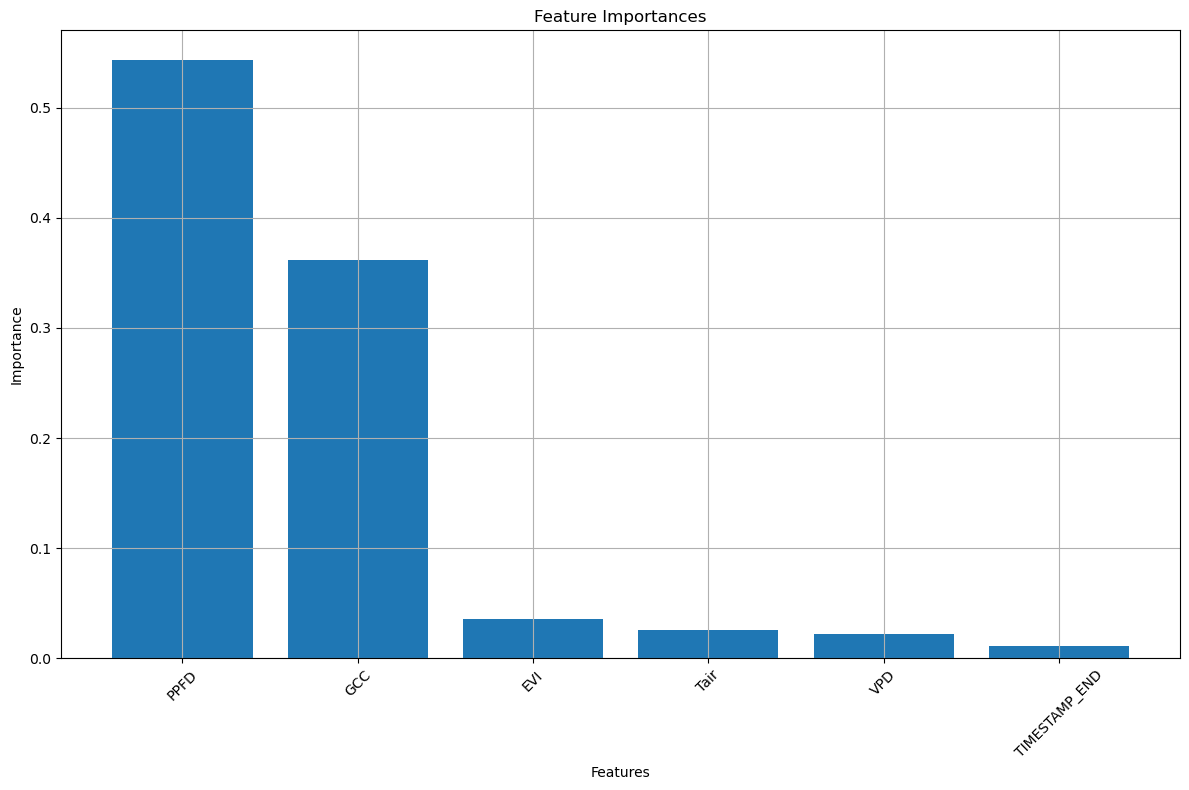

,Feature_Importances,predictors
5,0.542887,PPFD
1,0.361192,GCC
2,0.036073,EVI
3,0.025837,Tair
4,0.022268,VPD
0,0.011742,TIMESTAMP_END


In [7]:
fun_XGB.feature_importance(site_data_no_na, predictors, y_col, site_data_dir, reg)

# 05 annual sums and monthly sums

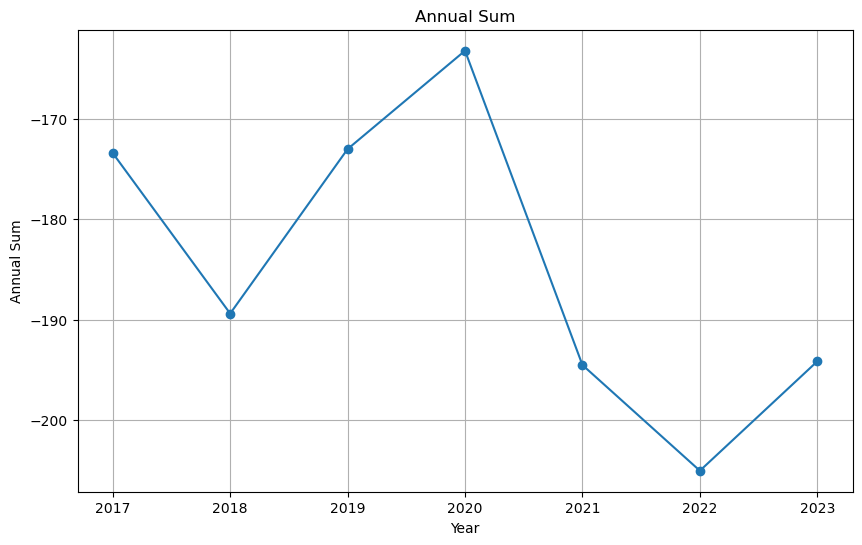

,Year,annual_sum
0,2017,-173.432357
1,2018,-189.398174
2,2019,-173.030032
3,2020,-163.244639
4,2021,-194.520744
5,2022,-205.038860
6,2023,-194.154325


In [13]:
data_prediction = pd.read_csv(site_data_dir/ "FC_XGB_prediction.csv")
fun_XGB.cal_annual_sum(data_prediction, "XGB_FC_f", 2017, 2023, site_data_dir)

Check if you have 'Month' and 'Year' columns in input data!


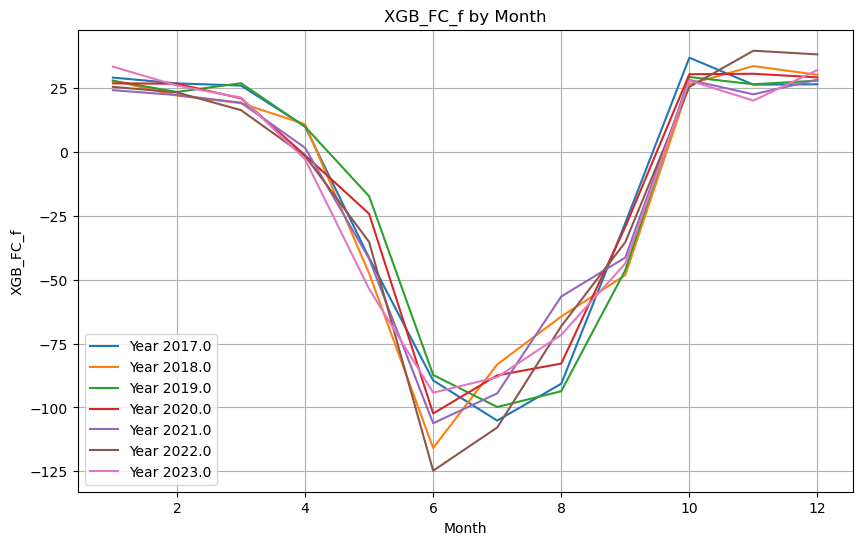

,Year,Month,monthly_sum
0,2017.0,1.0,29.042163
1,2017.0,2.0,26.762922
2,2017.0,3.0,25.932826
3,2017.0,4.0,9.930832
4,2017.0,5.0,-41.450485
...,...,...,...
79,2023.0,8.0,-71.600762
80,2023.0,9.0,-43.676442
81,2023.0,10.0,27.863257
82,2023.0,11.0,20.049091


In [14]:
fun_XGB.cal_monthly_sum(data_prediction, "XGB_FC_f", 2017, 2023, site_data_dir)